In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('NYC_CleanedData.csv')

In [5]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing

Unnamed: 0          0.0
CMPLNT_NUM          0.0
CMPLNT_FR_DT        0.0
CMPLNT_FR_TM        0.0
OFNS_DESC           0.0
CRM_ATPT_CPTD_CD    0.0
LAW_CAT_CD          0.0
BORO_NM             0.0
PREM_TYP_DESC       0.0
JURIS_DESC          0.0
X_COORD_CD          0.0
Y_COORD_CD          0.0
SUSP_AGE_GROUP      0.0
SUSP_RACE           0.0
SUSP_SEX            0.0
Latitude            0.0
Longitude           0.0
Lat_Lon             0.0
VIC_AGE_GROUP       0.0
VIC_RACE            0.0
VIC_SEX             0.0
YEAR                0.0
dtype: float64

In [6]:
for i in df.columns:
    print(i)
    print(df[i].unique())

Unnamed: 0
[      0       1       2 ... 1730339 1730340 1730341]
CMPLNT_NUM
[700381962 593660503 889259677 ... 421479092 331017091 800011842]
CMPLNT_FR_DT
['2015-05-28' '2012-02-20' '2012-09-28' ... '2018-03-13' '2018-02-06'
 '2018-03-02']
CMPLNT_FR_TM
['15:00:00' '01:30:00' '09:30:00' ... '07:57:00' '05:19:00' '06:19:00']
OFNS_DESC
['HARRASSMENT 2' 'ASSAULT 3 & RELATED OFFENSES' 'PETIT LARCENY'
 'DANGEROUS DRUGS' 'INTOXICATED & IMPAIRED DRIVING' 'FELONY ASSAULT'
 'OFF. AGNST PUB ORD SENSBLTY &' 'DANGEROUS WEAPONS'
 'OFFENSES AGAINST PUBLIC ADMINI' 'RAPE' 'ROBBERY' 'GRAND LARCENY'
 'CRIMINAL MISCHIEF & RELATED OF' 'MURDER & NON-NEGL. MANSLAUGHTER'
 'BURGLARY' 'OFFENSES INVOLVING FRAUD' 'UNAUTHORIZED USE OF A VEHICLE'
 'OTHER OFFENSES RELATED TO THEF' 'FRAUDS' 'CRIMINAL TRESPASS'
 'VEHICLE AND TRAFFIC LAWS' 'SEX CRIMES' 'FORGERY'
 'MISCELLANEOUS PENAL LAW' 'ADMINISTRATIVE CODE'
 'POSSESSION OF STOLEN PROPERTY' 'NYS LAWS-UNCLASSIFIED FELONY' 'ARSON'
 'OFFENSES AGAINST THE PERSON' "BURGLA

In [6]:
age_groups = df['SUSP_AGE_GROUP'].unique()

In [7]:
age_groups

array(['25-44', '45-64', '<18', '18-24', '65+'], dtype=object)

<AxesSubplot:xlabel='YEAR'>

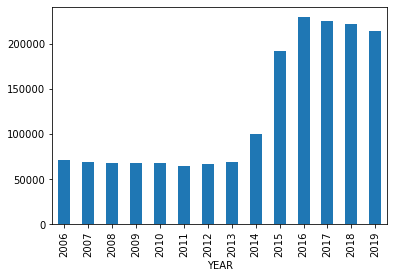

In [8]:
df.groupby(['YEAR'])['OFNS_DESC'].count().plot(kind='bar')

In [9]:
data = df['BORO_NM']
dict_boro ={}
for i in data:
    if i not in dict_boro:
        dict_boro[i]= 1
    else:
         dict_boro[i]+= 1
print(dict_boro)

{'BRONX': 418492, 'MANHATTAN': 363688, 'BROOKLYN': 511675, 'STATEN ISLAND': 88336, 'QUEENS': 343992, 'UNKNOWN': 4159}


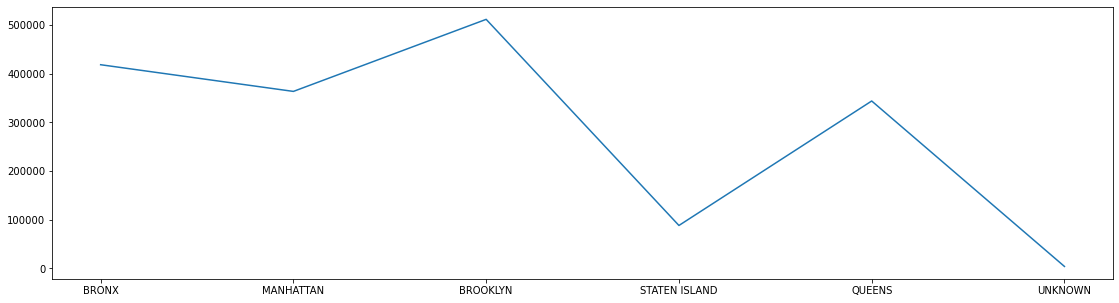

In [10]:
plt.figure(figsize=(19,5))
mylist= dict_boro.values()
mylist = list(mylist)
plt.plot(dict_boro.keys(),dict_boro.values())


In [11]:
yearwise = df[df.YEAR == 2019]

<AxesSubplot:xlabel='LAW_CAT_CD'>

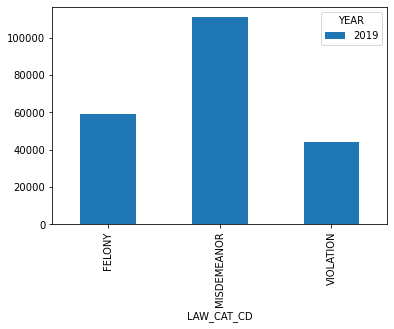

In [12]:
yearwise.groupby('YEAR').LAW_CAT_CD.value_counts().unstack(0).plot.bar()

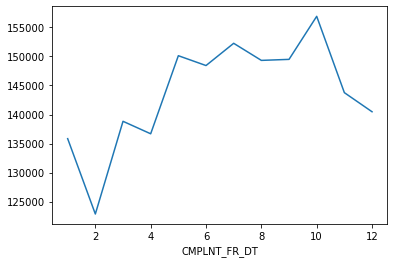

In [6]:
from datetime import datetime
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])
dfMonth = df.CMPLNT_FR_DT.dt.month
vis1 = df.groupby(dfMonth)['LAW_CAT_CD'].count().plot()

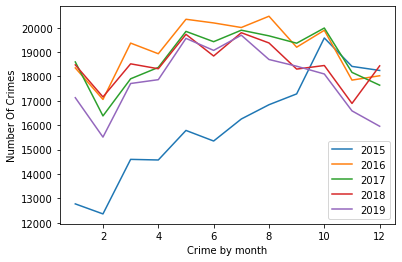

In [22]:
for i in range (2015,2020):
    yearwise = df[df.YEAR == i]
    dfMonth = yearwise.CMPLNT_FR_DT.dt.month
    vis1 = df.groupby(dfMonth)['LAW_CAT_CD'].count().plot()
    plt.legend(["2015","2016","2017","2018","2019"])
    plt.xlabel('Crime by month')
    plt.ylabel("Number Of Crimes")


In [15]:
df2 = pd.read_csv('NYC_CleanedData.csv')

In [18]:
df2['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'])
dfYear.index = dfYear.index.year
vis0 = dfYear.groupby([dfYear.index.get_level_values(0)])[['VIOLATION','FELONY','MISDEMEANOR']].sum()
vis0.plot.bar()
plt.title('Amount of crime per year')
plt.xlabel('Year')
plt.show()

KeyError: "Columns not found: 'MISDEMEANOR', 'FELONY', 'VIOLATION'"

In [ ]:
import mysql.connector as msql
from mysql.connector import Error
try:
    conn = msql.connect(host='localhost', user='root',  
                        password='Rutvikms@123',database = "ibd_project")
    if conn.is_connected():
        cursor = conn.cursor()
        print("Database is created")
except Error as e:
    print("Error while connecting to MySQL", e)


In [ ]:
df['CMPLNT_FR_DT']=df['CMPLNT_FR_DT'].astype(str)

In [ ]:
df.head()
df1 = df.copy()
df1 = df1[df.columns[1:20]]

In [ ]:
import mysql.connector as mysql
from mysql.connector import Error
try:
    conn = mysql.connect(host='localhost', database='ibd_project', user='root', password='Rutvikms@123')
    if conn.is_connected():
        cursor = conn.cursor()
        cursor.execute("select database();")
        record = cursor.fetchone()
        print("You're connected to database: ", record)
        cursor.execute('DROP TABLE IF EXISTS NY_Crime;')
        print('Creating table....')
# in the below line please pass the create table statement which you want #to create
        cursor.execute("CREATE TABLE NY_Crime(CMPLNT_NUM varchar(255),CMPLNT_FR_DT varchar(255),CMPLNT_FR_TM varchar(255),OFNS_DESC varchar(255),CRM_ATPT_CPTD_CD varchar(255),LAW_CAT_CD varchar(255),BORO_NM varchar(255),PREM_TYP_DESC varchar(255),JURIS_DESC varchar(255),SUSP_AGE_GROUP varchar(255),SUSP_RACE varchar(255),SUSP_SEX  varchar(255),Latitude varchar(255),Longitude varchar(255),Lat_Lon varchar(255),VIC_AGE_GROUP varchar(255),VIC_RACE varchar(255),VIC_SEX varchar(255),YEAR varchar(255))")
        print("Table is created....")
        #loop through the data frame
        for i,row in df1.iterrows():
            
            #here %S means string values 
            sql = "INSERT INTO ibd_project.NY_Crime VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
            cursor.execute(sql, tuple(row))
            print("Record inserted")
            # the connection is not auto committed by default, so we must commit to save our changes
            conn.commit()
except Error as e:
            print("Error while connecting to MySQL", e)

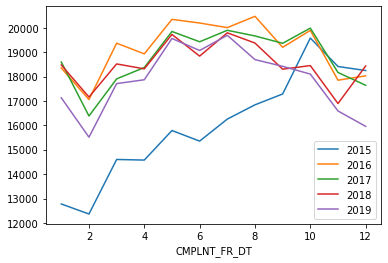

In [38]:
for i in range (2015,2020):
    yearwise = df[df.YEAR == i]
    dfMonth = yearwise.CMPLNT_FR_DT.dt.month
    vis1 = df.groupby(dfMonth)['LAW_CAT_CD'].count().plot()
    plt.legend(["2015","2016","2017","2018","2019"])

Text(0.5, 0, 'Number of Crimes')

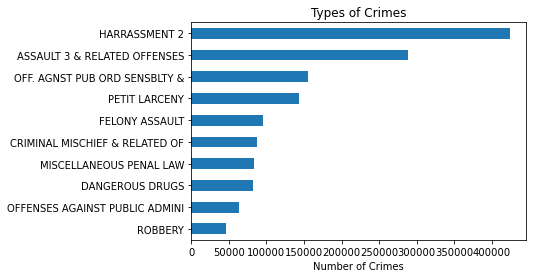

In [23]:
df.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")
plt.xlabel('Number of Crimes')

In [15]:
crime = df.groupby('LAW_CAT_CD')['CMPLNT_NUM'].count()


LAW_CAT_CD
FELONY         397335
MISDEMEANOR    905675
VIOLATION      427332
Name: CMPLNT_NUM, dtype: int64


<ipython-input-33-7d6ded35aa7a>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_ylabel('')


Text(0, 0.5, '')

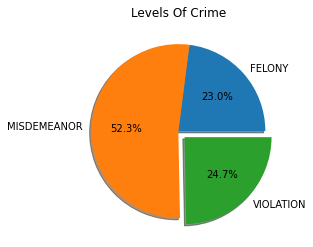

In [33]:
plot = crime.plot.pie(y='hours',title="Levels Of Crime", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)
plt.axes().set_ylabel('')

<AxesSubplot:title={'center':'Total Crime Events by Year'}>

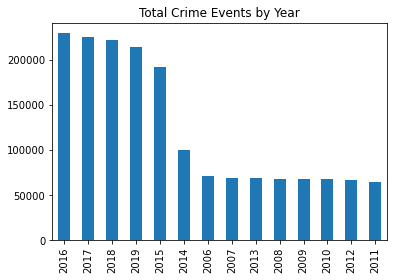

In [37]:
df['YEAR'].value_counts().plot(kind="bar", title = "Total Crime Events by Year")

YEAR
2006     71588
2007     69625
2008     68159
2009     67786
2010     67765
2011     64799
2012     67205
2013     69146
2014    100687
2015    192076
2016    229687
2017    225240
2018    222275
2019    214304
Name: CMPLNT_NUM, dtype: int64


<AxesSubplot:xlabel='YEAR'>

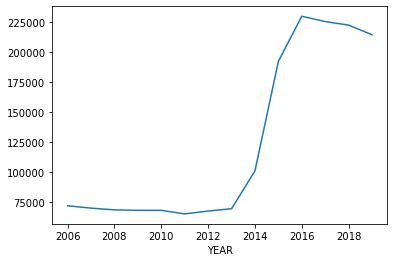

In [42]:
crime = df.groupby('YEAR')['CMPLNT_NUM'].count()
print(crime)
crime.plot(kind="line")

In [43]:
sex_crimes = df[df.OFNS_DESC.str.contains('SEX CRIMES|RAPE')]

Text(0.5, 1.0, 'Sex crimes by year')

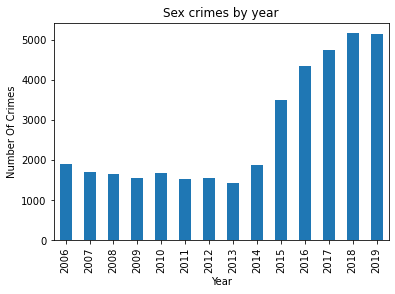

In [51]:
sex_crimes.groupby("YEAR")['CMPLNT_NUM'].count().plot(kind = "bar")
plt.xlabel('Year')
plt.ylabel("Number Of Crimes")
plt.title("Sex crimes by year")

In [52]:
df.head()

,Unnamed: 0,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,CRM_ATPT_CPTD_CD,LAW_CAT_CD,BORO_NM,PREM_TYP_DESC,JURIS_DESC,...,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,YEAR
0,0,700381962,2015-05-28,15:00:00,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,...,25-44,BLACK,M,40.845868,-73.915888,"(40.84586773, -73.915888033)",25-44,WHITE HISPANIC,F,2015
1,1,593660503,2012-02-20,01:30:00,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,MANHATTAN,RESIDENCE - APT. HOUSE,N.Y. POLICE DEPT,...,25-44,BLACK,M,40.811522,-73.940601,"(40.811522012, -73.940601181)",25-44,BLACK,F,2012
2,2,889259677,2012-09-28,09:30:00,HARRASSMENT 2,COMPLETED,VIOLATION,BRONX,RESIDENCE-HOUSE,N.Y. POLICE DEPT,...,25-44,BLACK HISPANIC,M,40.878003,-73.846892,"(40.878003133, -73.846891755)",18-24,BLACK HISPANIC,F,2012
3,3,602484492,2017-03-26,12:00:00,PETIT LARCENY,COMPLETED,MISDEMEANOR,BROOKLYN,CHAIN STORE,N.Y. POLICE DEPT,...,25-44,WHITE,F,40.631257,-73.945996,"(40.63125716, -73.945996398)",UNKNOWN,UNKNOWN,D,2017
4,4,331617213,2016-10-13,16:55:00,DANGEROUS DRUGS,COMPLETED,FELONY,MANHATTAN,RESIDENCE - PUBLIC HOUSING,N.Y. HOUSING POLICE,...,45-64,BLACK,M,40.798964,-73.950314,"(40.798963998, -73.95031372)",UNKNOWN,UNKNOWN,E,2016


Text(0.5, 1.0, 'Crimes Victims by Gender')

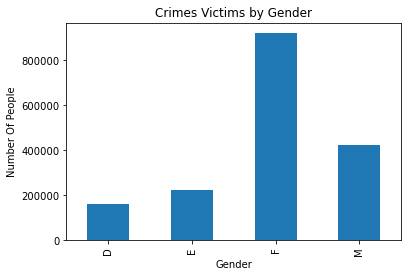

In [70]:
victim = df.groupby("VIC_SEX")['CMPLNT_NUM'].count()
victim = victim.iloc[0:4]
victim.plot(kind = 'bar')
plt.xlabel('Gender')
plt.ylabel("Number Of People")
plt.title("Crimes Victims by Gender")

Text(0.5, 1.0, 'Crimes by Month')

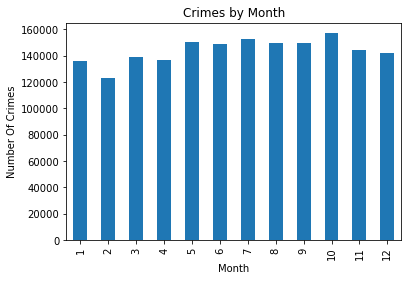

In [73]:
dfMonth = df.CMPLNT_FR_DT.dt.month
df.groupby(dfMonth)['CMPLNT_NUM'].count().plot(kind='bar')
plt.xlabel('Month')
plt.ylabel("Number Of Crimes")
plt.title("Crimes by Month")

Text(0.5, 1.0, 'Crimes by Hours')

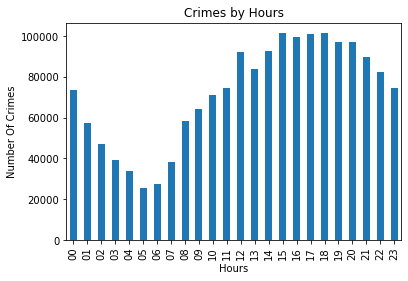

In [7]:
df2= df.copy()
df2['CMPLNT_FR_TM'] = pd.to_datetime(df2['CMPLNT_FR_TM'])
df2['CMPLNT_FR_TM'] = df2['CMPLNT_FR_TM'].dt.strftime('%H')
df2.groupby('CMPLNT_FR_TM')['CMPLNT_NUM'].count().plot(kind='bar')
plt.xlabel('Hours')
plt.ylabel("Number Of Crimes")
plt.title("Crimes by Hours")

In [79]:
df2['CMPLNT_FR_TM']

0         2021-07-09 15:00:00
1         2021-07-09 01:30:00
2         2021-07-09 09:30:00
3         2021-07-09 12:00:00
4         2021-07-09 16:55:00
                  ...        
1730337   2021-07-09 17:42:00
1730338   2021-07-09 00:01:00
1730339   2021-07-09 07:56:00
1730340   2021-07-09 22:00:00
1730341   2021-07-09 23:05:00
Name: CMPLNT_FR_TM, Length: 1730342, dtype: datetime64[ns]

Text(0.5, 1.0, 'Crimes Victims by Race')

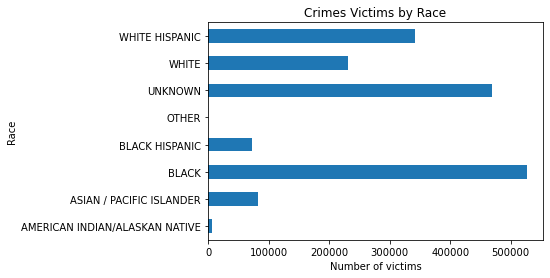

In [86]:
victim = df.groupby("VIC_RACE")['CMPLNT_NUM'].count()
victim.plot(kind = 'barh')
plt.xlabel('Number of victims')
plt.ylabel("Race")
plt.title("Crimes Victims by Race")

In [87]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np

ModuleNotFoundError: No module named 'geoplot'